In [16]:
import numpy
import pandas
import seaborn
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

In [3]:
# Esta celda conecta el Google Drive al notebook:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Esta celda importa el dataset 'cartones_registrados' al notebook:
df = pandas.read_csv("/content/drive/My Drive/DataSets/cartones_registrados.csv")

In [5]:
# Esta celda devuelve el producto de filas por columnas: (filas * columnas)
df.size

198624

In [6]:
# Esta celda devuelve la cantidad de filas, y la cantidad de columnas: (filas, columnas)
df.shape

(12414, 16)

In [7]:
# Esta celda devuelve los primeros valores de las filas del dataframe:
df.head()

,Id,Juego,Carton,Serie,Progresivo,Hora,Fecha,Usuario,ValorCarton,ValorProgresivo,Contados,Pistola,Gratis,Recuperado,Cliente,ClientePersonal
0,345422,1170,11823,x,0,12:04,27/03/2024,6,0,0,0,131,0,0,NaN,NaN
1,345423,1170,11204,x,0,12:04,27/03/2024,6,0,0,0,131,0,0,NaN,NaN
2,345424,1170,12486,X,0,12:05,27/03/2024,6,0,0,0,131,0,0,NaN,NaN
3,345425,1170,12572,X,0,12:05,27/03/2024,6,0,0,0,131,0,0,NaN,NaN
4,345426,1170,13067,X,0,12:05,27/03/2024,18,0,0,0,121,0,0,NaN,NaN


In [8]:
# Esta celda muestra información básica del dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12414 entries, 0 to 12413
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               12414 non-null  int64  
 1   Juego            12414 non-null  int64  
 2   Carton           12414 non-null  int64  
 3   Serie            12414 non-null  object 
 4   Progresivo       12414 non-null  int64  
 5   Hora             12414 non-null  object 
 6   Fecha            12414 non-null  object 
 7   Usuario          12414 non-null  int64  
 8   ValorCarton      12414 non-null  int64  
 9   ValorProgresivo  12414 non-null  int64  
 10  Contados         12414 non-null  int64  
 11  Pistola          12414 non-null  int64  
 12  Gratis           12414 non-null  int64  
 13  Recuperado       12414 non-null  int64  
 14  Cliente          0 non-null      float64
 15  ClientePersonal  0 non-null      float64
dtypes: float64(2), int64(11), object(3)
memory usage: 1.5+ MB


In [ ]:
# Esta celda devuelve la tabla con estadísticas básicas (tabla original):
df.describe()

,Id,Juego,Carton,Progresivo,Usuario,ValorCarton,ValorProgresivo,Contados,Pistola,Gratis,Recuperado,Cliente,ClientePersonal
count,12414.000000,12414.000000,12414.000000,12414.0,12414.000000,12414.0,12414.0,12414.0,12414.000000,12414.0,12414.000000,0.0,0.0
mean,351640.417593,1191.450540,12008.289915,0.0,12.276059,0.0,0.0,0.0,126.973095,0.0,-0.037860,NaN,NaN
std,3590.526791,10.174705,995.609455,0.0,10.116652,0.0,0.0,0.0,3.398160,0.0,0.190866,NaN,NaN
min,345422.000000,1170.000000,2330.000000,0.0,2.000000,0.0,0.0,0.0,121.000000,0.0,-1.000000,NaN,NaN
25%,348532.250000,1184.000000,11231.000000,0.0,3.000000,0.0,0.0,0.0,124.000000,0.0,0.000000,NaN,NaN
50%,351640.500000,1192.000000,12174.000000,0.0,6.000000,0.0,0.0,0.0,127.000000,0.0,0.000000,NaN,NaN
75%,354746.750000,1199.000000,12797.000000,0.0,23.000000,0.0,0.0,0.0,130.000000,0.0,0.000000,NaN,NaN
max,357861.000000,1210.000000,13780.000000,0.0,33.000000,0.0,0.0,0.0,131.000000,0.0,0.000000,NaN,NaN


In [12]:
# Esta celda se encarga de seleccionar solo las columnas numéricas:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

In [13]:
# Esta celda crea el normalizador:
scaler = StandardScaler()

In [15]:
# Esta celda ajusta y transforma los datos numéricos:
df_normalized = pandas.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [17]:
# Esta celda configura a Seaborn:
seaborn.set()

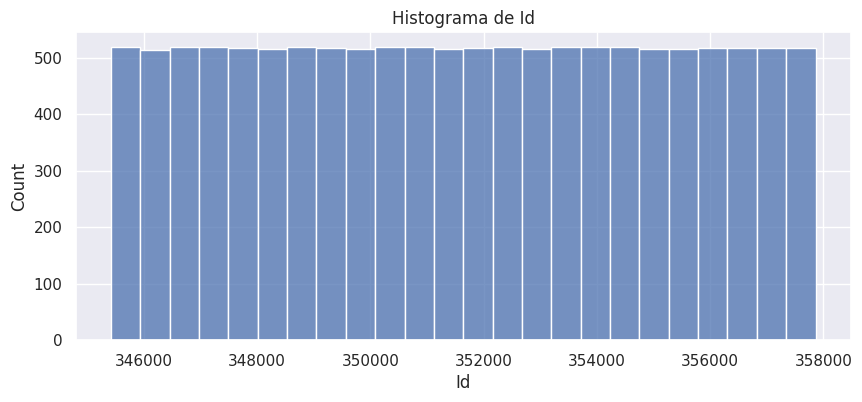

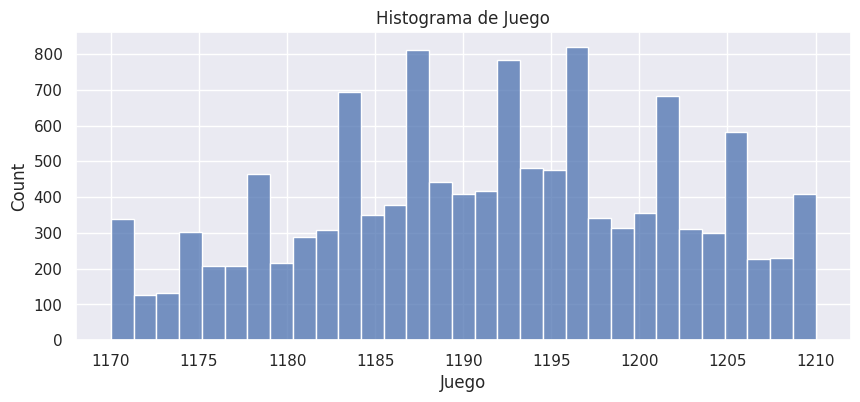

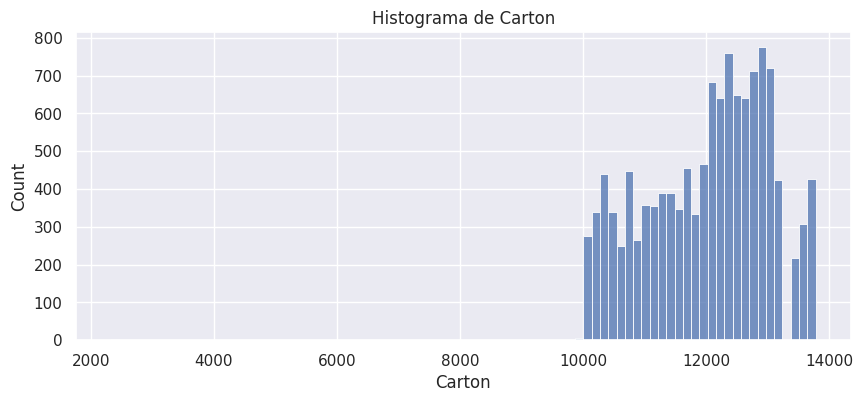

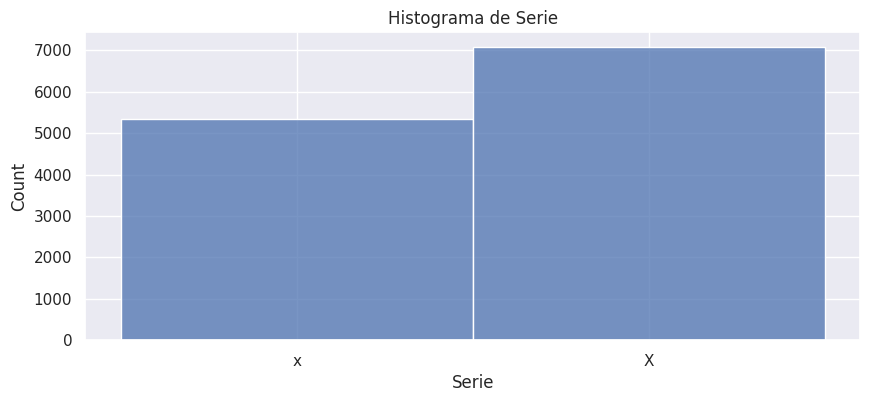

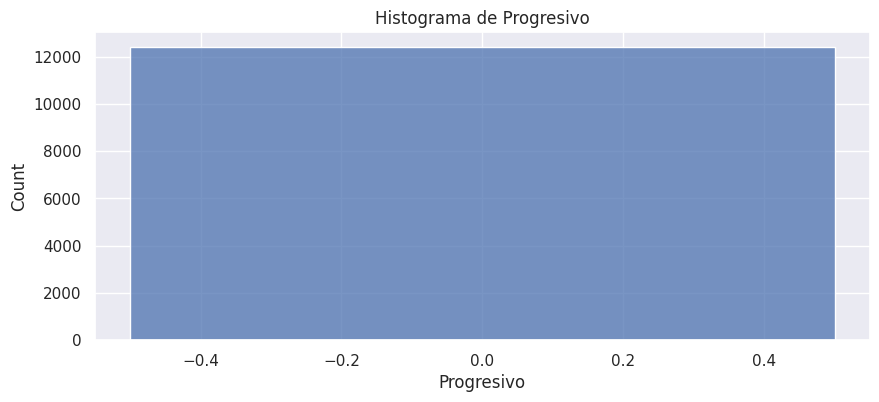

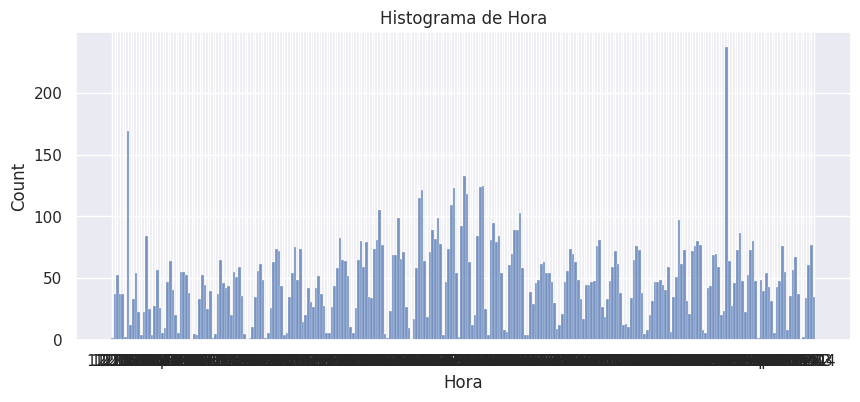

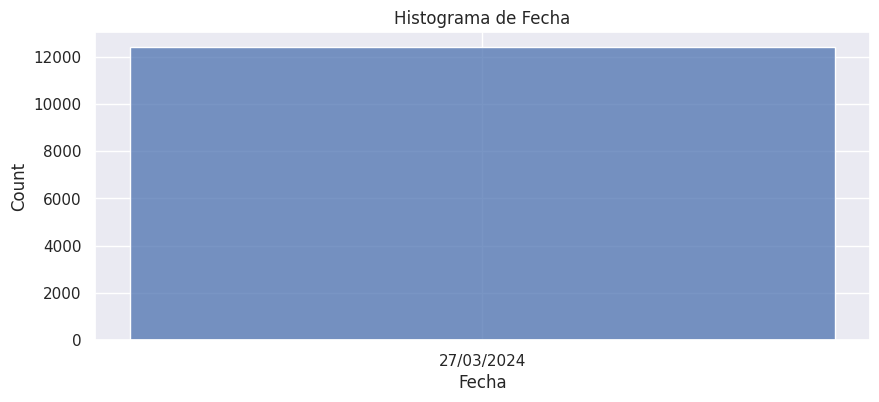

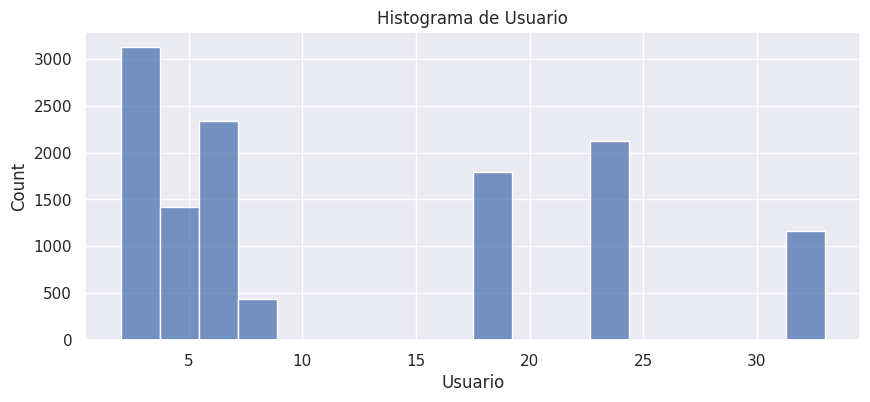

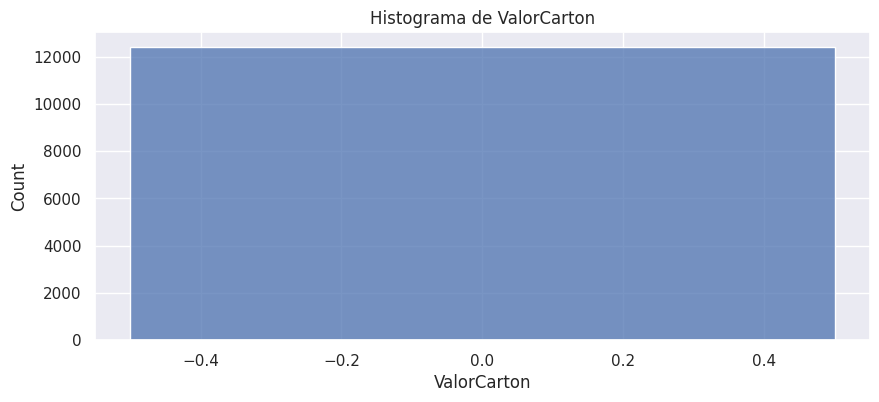

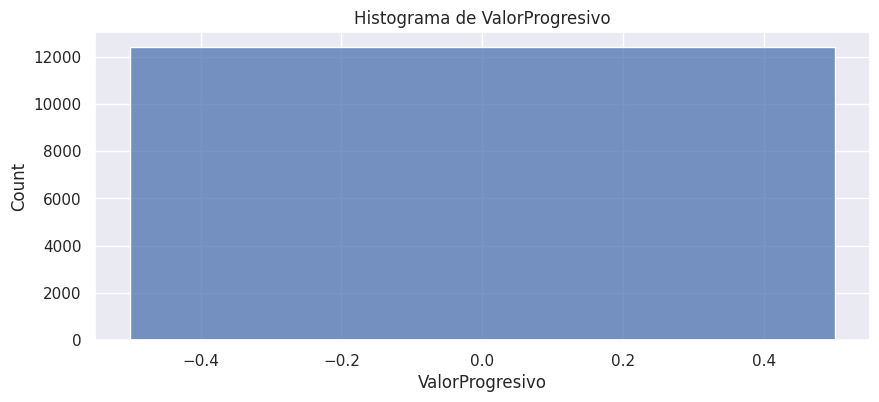

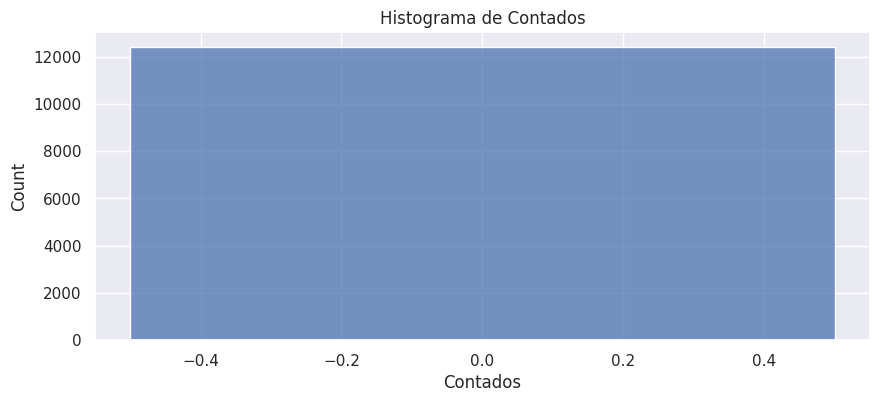

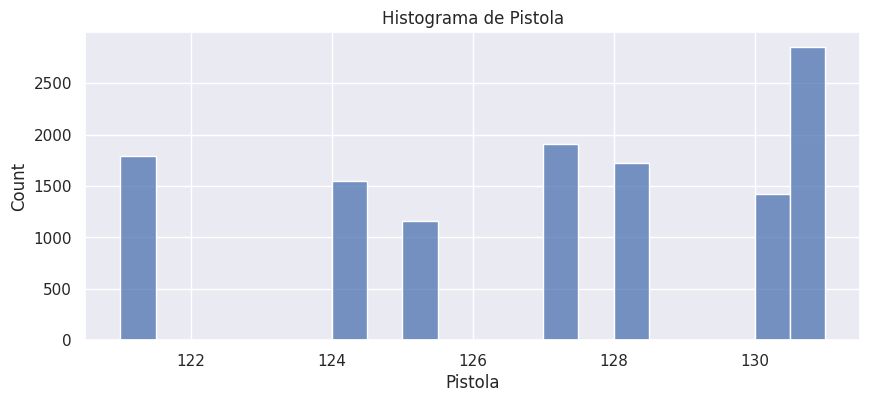

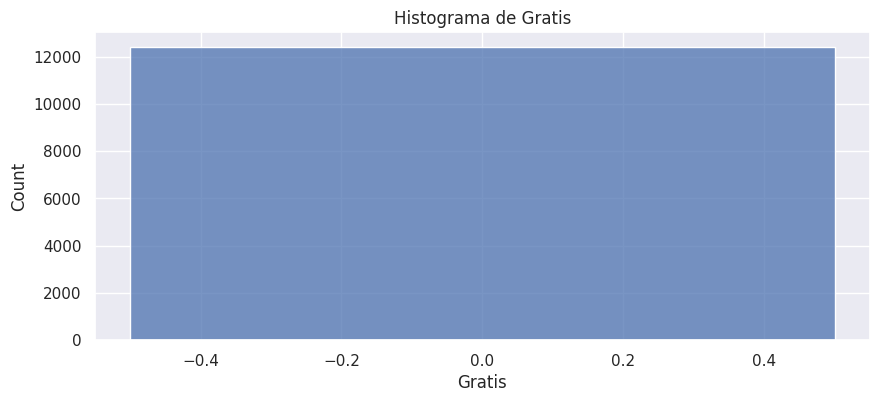

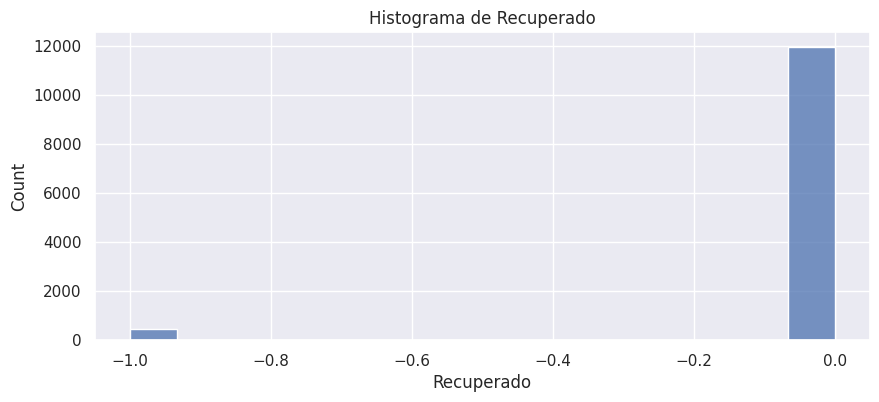

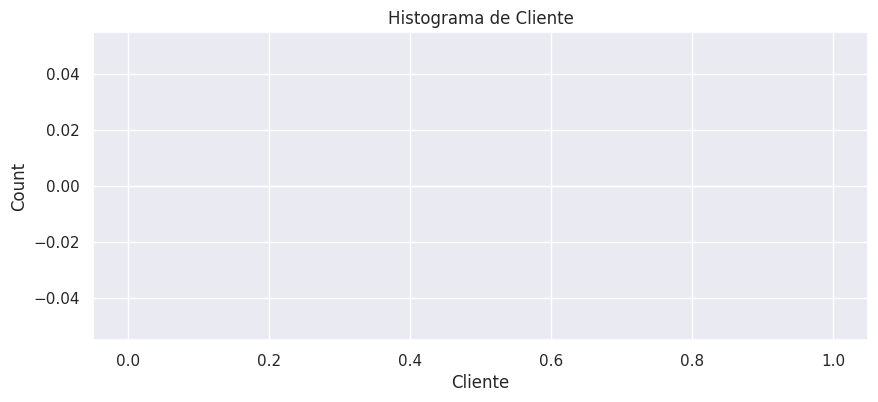

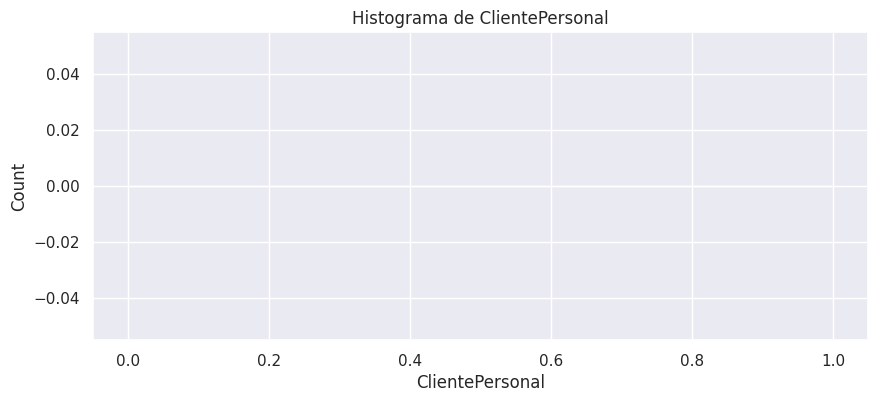

In [18]:
# Esta celda crea un histograma para cada característica:
for column in df.columns:
    pyplot.figure(figsize=(10, 4))
    seaborn.histplot(df[column])
    pyplot.title(f'Histograma de {column}')
    pyplot.show()